# &emsp;Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder

# Understanding Data

## &emsp;Importing Data

### &emsp;&emsp;Submission Sample

In [2]:
submission_sample = pd.read_csv('data/gender_submission.csv', dtype={'PassengerId': np.uint16, 'Survived': np.bool})
submission_sample.head(5)

,PassengerId,Survived
0,892,False
1,893,True
2,894,False
3,895,False
4,896,True


### &emsp;&emsp;Test Data

In [3]:
test_data = pd.read_csv('data/test.csv', dtype={'PassengerId': np.uint16,
                                                'Pclass': np.uint8,
                                                'Name': 'object',
                                                'Sex': 'object',
                                                'Age': np.float32,
                                                'SibSp': np.uint8,
                                                'Parch': np.uint8,
                                                'Ticket': 'object',
                                                'Fare': np.float32,
                                                'Cabin': 'object',
                                                'Embarked': 'object'})
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### &emsp;&emsp;Train Data

In [4]:
train_data = pd.read_csv('data/train.csv', dtype={'PassengerId': np.uint16,
                                                'Survived': np.bool,
                                                'Pclass': np.uint8,
                                                'Name': 'object',
                                                'Sex': 'object',
                                                'Age': np.float32,
                                                'SibSp': np.uint8,
                                                'Parch': np.uint8,
                                                'Ticket': 'object',
                                                'Fare': np.float32,
                                                'Cabin': 'object',
                                                'Embarked': 'object'})
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S


## &emsp;Analysing Data

By the classical woman and children first, lets encode Sex Feature

In [14]:
train_data['Sex'] = train_data['Sex'].apply(lambda x:0 if x == 'male' else 1)

Analysing position in Titanic *Cabin*

In [66]:
cabin_df = train_data[['Cabin', 'Survived']].copy()
cabin_df = cabin_df[~cabin_df['Cabin'].isna()]

cabin_df['Cabin_Level'] = cabin_df['Cabin'].str.extract(r'([A-Z])')
cabin_encoder = {}
c = 0
Cabin_Level = cabin_df['Cabin_Level'].unique()
Cabin_Level.sort()
for cabin in Cabin_Level:
    cabin_encoder[cabin] = c
    c+=1

cabin_df['Cabin_Level'] = cabin_df['Cabin_Level'].apply(lambda x: cabin_encoder[x])

cabin_df['Cabin_Number'] = cabin_df['Cabin'].str.extract(r'([0-9]{1,3})')
cabin_df['Cabin_Number'] = pd.to_numeric(cabin_df['Cabin_Number'])


In [65]:
cabin_df

,Survived,Cabin_Level,Cabin_Number
1,True,2,85
3,True,2,123
6,False,4,46
10,True,6,6
11,True,2,103
...,...,...,...
871,True,3,35
872,False,1,51
879,True,2,50
887,True,1,42


In [62]:
cabin_df = cabin_df.drop(columns=['Cabin'])

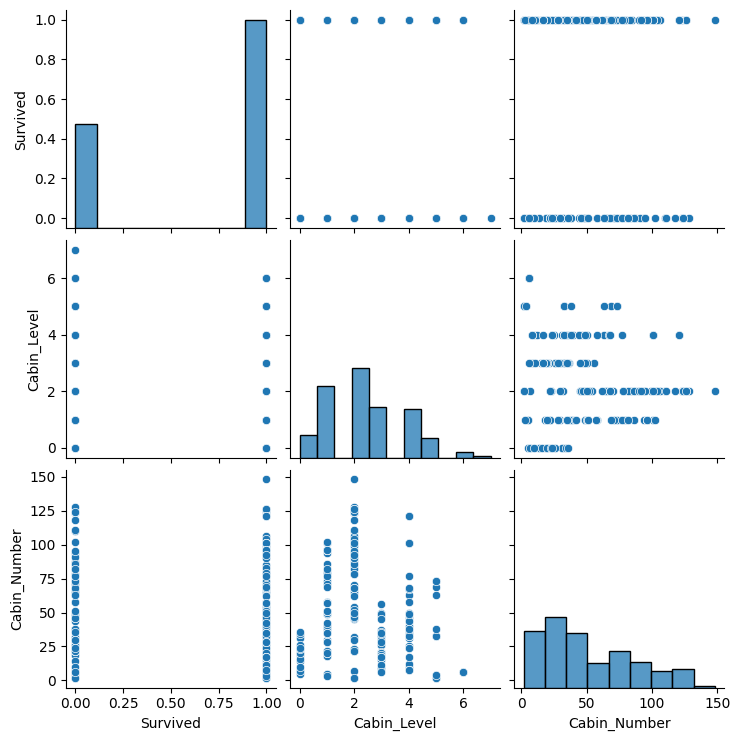

In [67]:
sns.pairplot(cabin_df)

### &emsp;&emsp;Balance

In [64]:
train_data.groupby('Survived').agg({ 'PassengerId': 'count'})

,PassengerId
Survived,
False,549
True,342


#### &emsp;&emsp;&emsp;Undersampling Majority Class

In [6]:
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
X_resampled, y_X_resampled = rus.fit_resample(train_data.drop(columns=['Survived']), train_data['Survived'])
undersampled_train_data = pd.concat([X_resampled, y_X_resampled], axis=1)

In [7]:
undersampled_train_data.groupby('Survived').agg({ 'PassengerId': 'count'})

,PassengerId
Survived,
False,342
True,342


#### &emsp;&emsp;&emsp;Oversampling Minority Class

In [8]:
ros = RandomOverSampler(random_state=42, sampling_strategy = 'minority')
X_resampled, y_X_resampled = ros.fit_resample(train_data.drop(columns = ['Survived']), train_data['Survived'])
oversampled_train_data = pd.concat([X_resampled, y_X_resampled], axis=1)

In [9]:
oversampled_train_data.groupby('Survived').agg({ 'PassengerId': 'count'})

,PassengerId
Survived,
False,549
True,549


### &emsp;&emsp;Correlation

#### &emsp;&emsp;&emsp;Linear

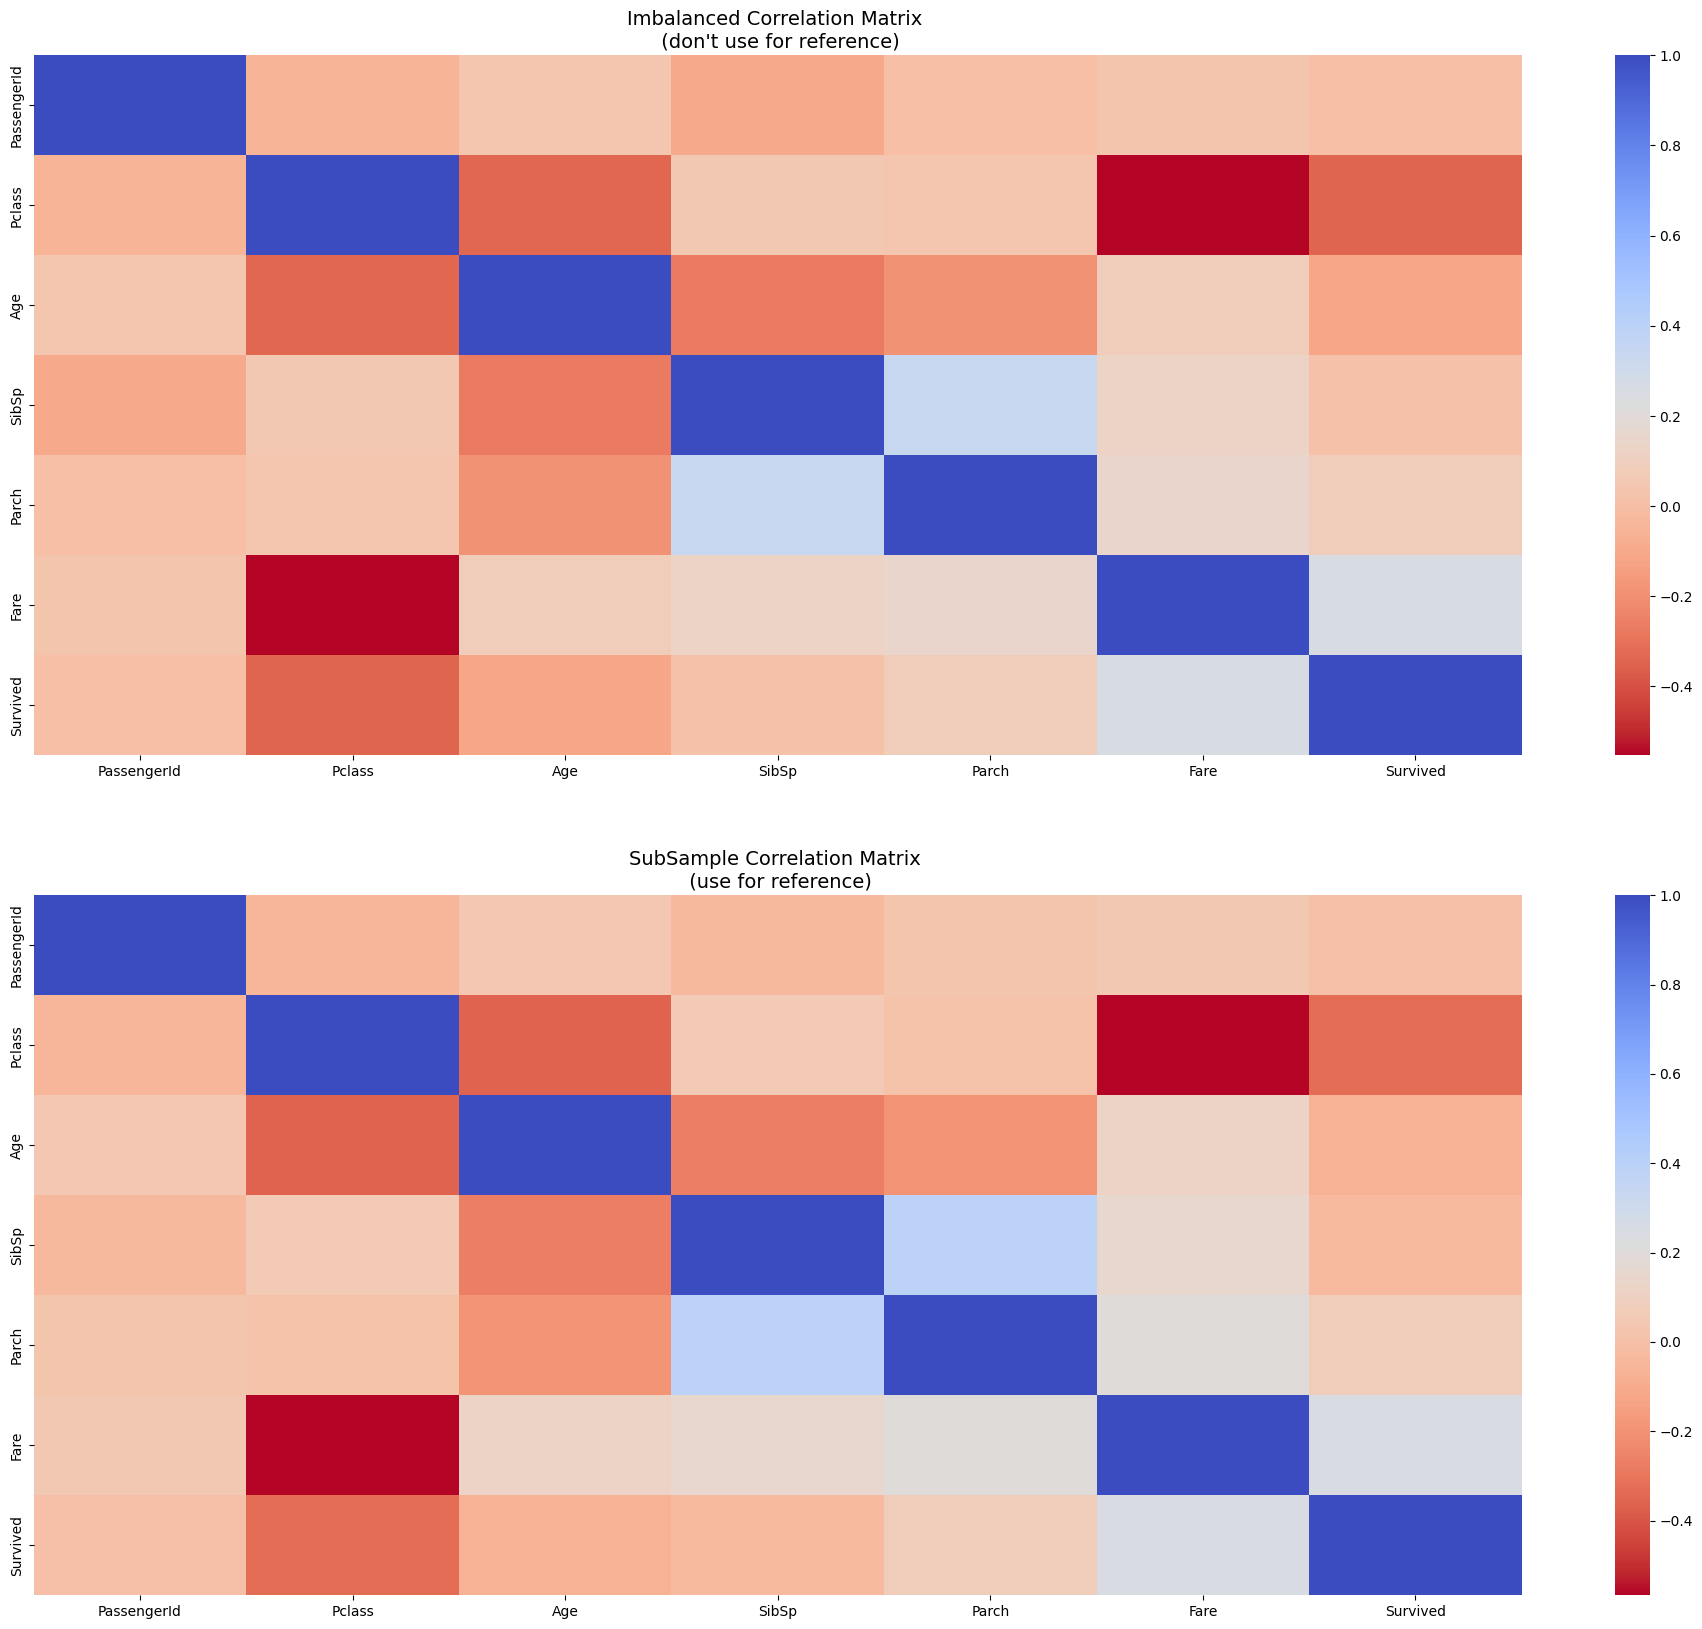

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = undersampled_train_data.select_dtypes(exclude=['object']).corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = oversampled_train_data.select_dtypes(exclude=['object']).corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

#### &emsp;&emsp;&emsp;Non-Linear

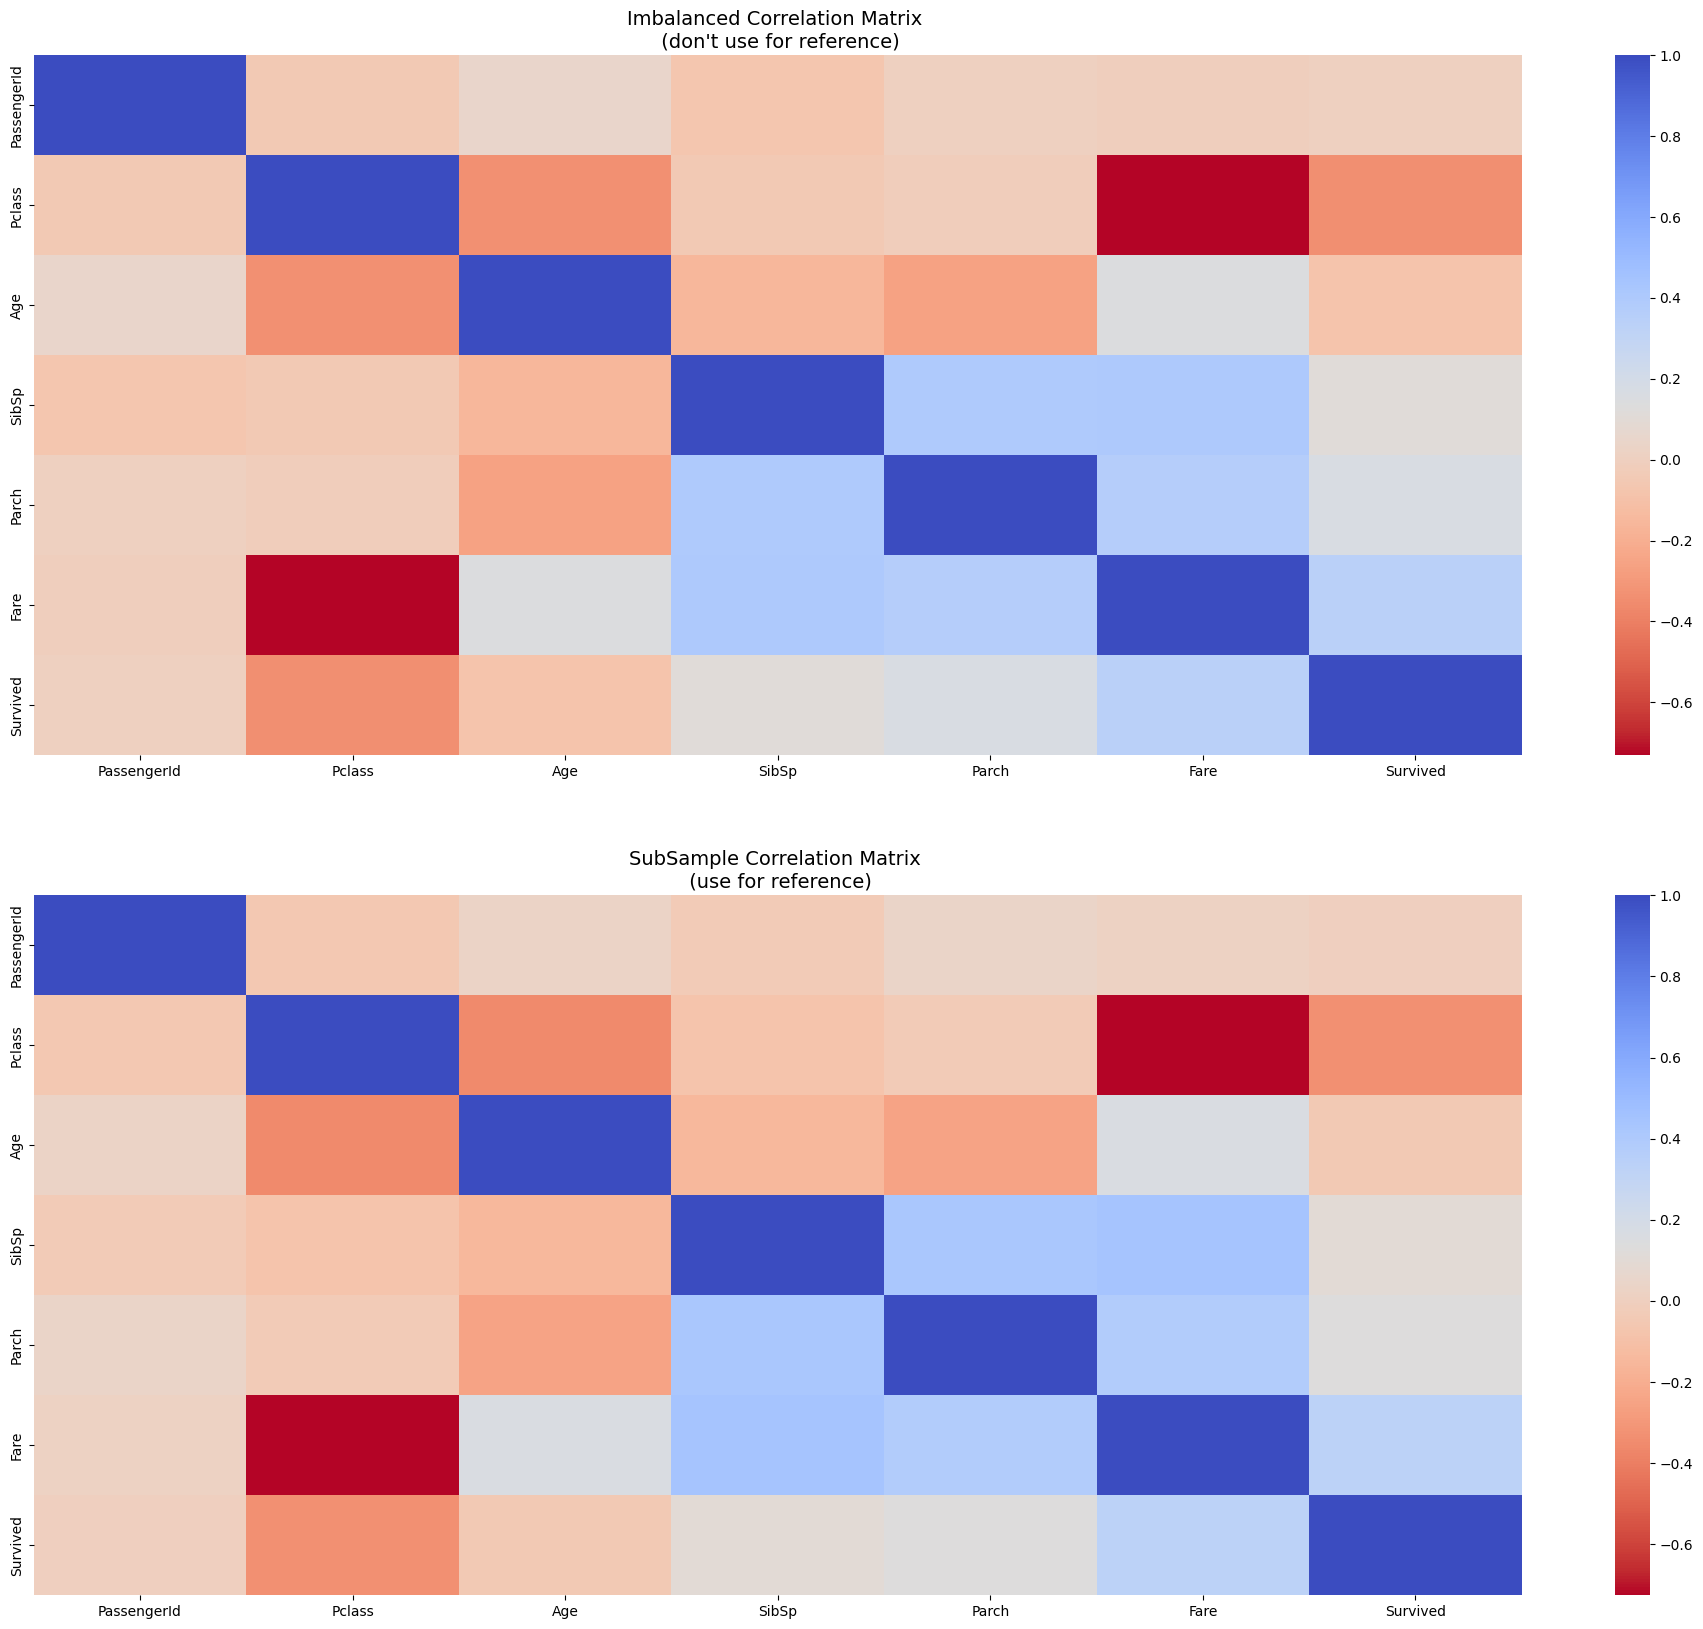

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = undersampled_train_data.select_dtypes(exclude=['object']).corr(method = 'spearman')
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = oversampled_train_data.select_dtypes(exclude=['object']).corr(method = 'spearman')
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

#### &emsp;&emsp;&emsp;Observation

We have weak correlation in both cases, but it's possible to see a negative correlation between survival probabiltiy and *PClass* and of course a positive correlation between *Fare* and survival probability.

In [12]:
undersampled_train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
312,313,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.000000,NaN,S,False
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.287498,D26,S,False
783,784,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.450001,NaN,S,False
167,168,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.900000,NaN,S,False
772,773,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.500000,E77,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.225000,NaN,C,True
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.158302,C50,C,True
880,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.000000,NaN,S,True
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000000,B42,S,True


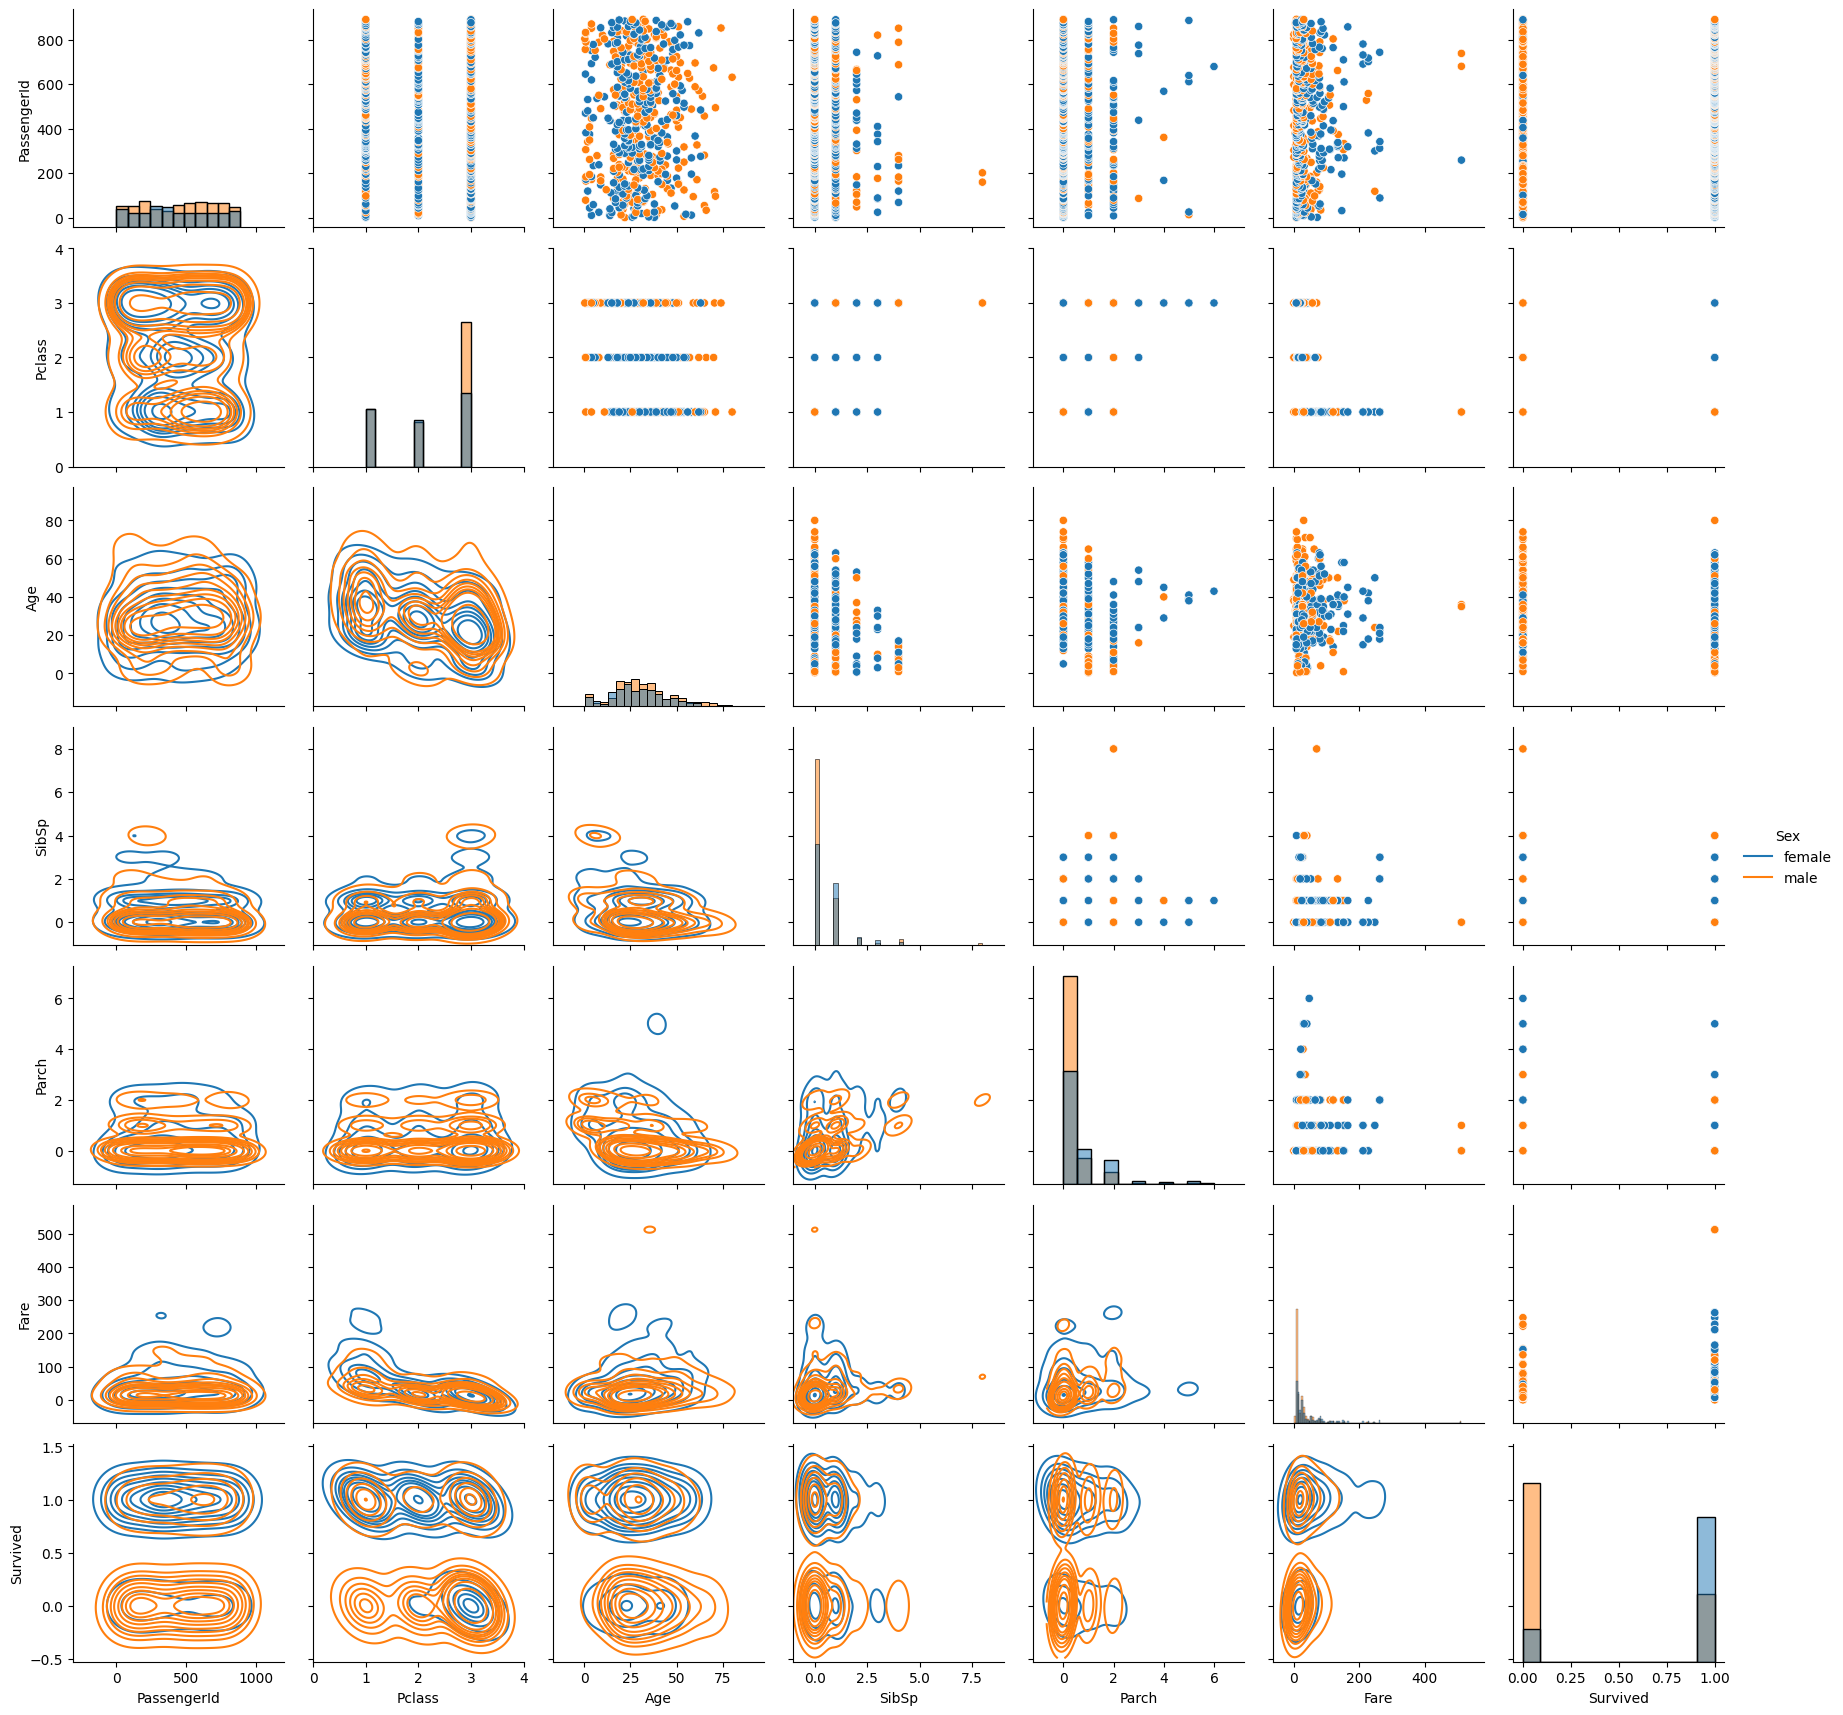

In [13]:
g = sns.PairGrid(undersampled_train_data[list(undersampled_train_data.select_dtypes(exclude='object').columns)+['Sex']], hue = 'Sex')
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()


#### &emsp;&emsp;&emsp;WOMANS AND CHILDRENS FIRST!

C:\Users\Thales\AppData\Local\Temp\ipykernel_14900\783962293.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  undersampled_train_data.groupby(pd.cut(undersampled_train_data["Age"], np.arange(0,undersampled_train_data["Age"].max(), 7))).agg({'Survived': 'mean'}).plot(kind='bar')


<Axes: xlabel='Age'>

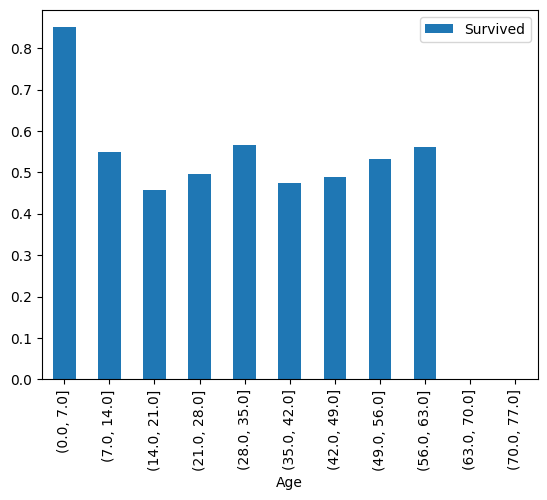

In [15]:
undersampled_train_data.groupby(pd.cut(undersampled_train_data["Age"], np.arange(0,undersampled_train_data["Age"].max(), 7))).agg({'Survived': 'mean'}).plot(kind='bar')

<Axes: xlabel='Sex'>

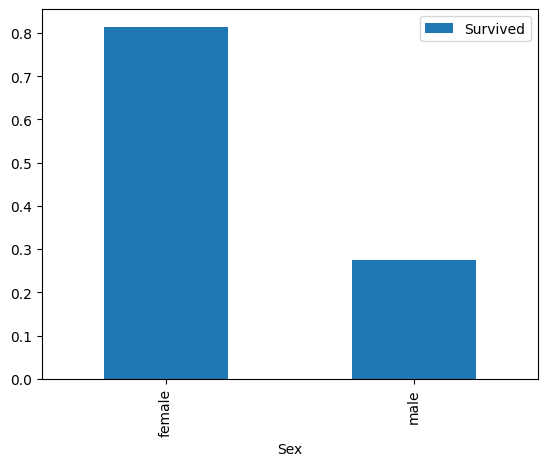

In [16]:
undersampled_train_data.groupby('Sex').agg({'Survived': 'mean'}).plot(kind='bar')